1. Download Dataset from KaggleHub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valentynsichkar/traffic-signs-preprocessed")

print("Dataset Path:", path)


100%|██████████| 4.16G/4.16G [00:38<00:00, 115MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/valentynsichkar/traffic-signs-preprocessed/versions/2


2. Load Training, Validation, and Test Sets from Pickle Files

In [3]:
import pickle

def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

base_path = "/root/.cache/kagglehub/datasets/valentynsichkar/traffic-signs-preprocessed/versions/2"

train = load_pickle(f"{base_path}/train.pickle")
valid = load_pickle(f"{base_path}/valid.pickle")
test = load_pickle(f"{base_path}/test.pickle")

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)


Train: (34799, 32, 32, 3) Valid: (4410, 32, 32, 3) Test: (12630, 32, 32, 3)


3. Normalize Images and One-Hot Encode Labels

In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)

n_classes = y_train_cat.shape[1]
print("Number of Classes:", n_classes)


Number of Classes: 43


4. Build and Compile Custom CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_cnn(input_shape, n_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(n_classes, activation='softmax')
    ])
    return model

input_shape = X_train.shape[1:]
model = create_custom_cnn(input_shape, n_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

5. Train the CNN Model

In [11]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    validation_data=(X_valid, y_valid_cat),
                    batch_size=64)


Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9509 - loss: 0.1453 - val_accuracy: 0.9537 - val_loss: 0.1628
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.9544 - loss: 0.1337 - val_accuracy: 0.9601 - val_loss: 0.1298
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9584 - loss: 0.1227 - val_accuracy: 0.9642 - val_loss: 0.1443
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.9622 - loss: 0.1114 - val_accuracy: 0.9664 - val_loss: 0.1424
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9660 - loss: 0.1044 - val_accuracy: 0.9624 - val_loss: 0.1702
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9712 - loss: 0.0868 - val_accuracy: 0.9683 - val_loss: 0.1262
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9683 - loss: 0.0909 - val_accuracy: 0.9653 - val_loss: 0.1518
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9710 - loss: 0.0844 - 

6. Evaluate the Model on Test Data

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9567 - loss: 0.2477
Test Accuracy: 0.95502769947052


7. Plot Confusion Matrix for Model Predictions

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


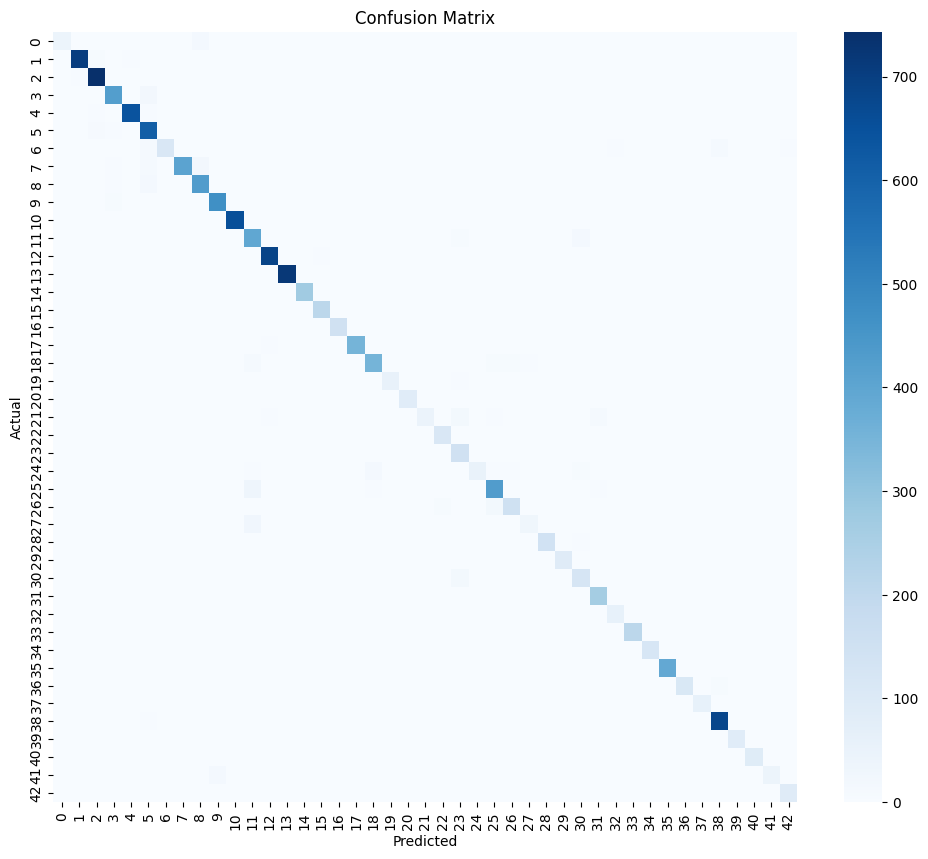

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


8. Save the Trained CNN Model

In [14]:
model.save("traffic_sign_cnn_model.h5")


9. Predict Traffic Sign from Custom Image

In [16]:
import cv2

def predict_custom_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    pred_class = np.argmax(pred)

    with open(f"{base_path}/label_names.csv") as f:
        lines = f.readlines()
        label_names = [line.strip().split(';')[-1] for line in lines[1:]]

    print(f"Predicted class: {pred_class} - {label_names[pred_class]}")

# Example:
predict_custom_image("/content/stop.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 38 - 38,Keep right


10 (Bonus 1). Apply Data Augmentation and Retrain Model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

datagen.fit(X_train)

aug_model = create_custom_cnn(input_shape, n_classes)
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

aug_model.fit(datagen.flow(X_train, y_train_cat, batch_size=64),
              validation_data=(X_valid, y_valid_cat),
              epochs=10)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


544/544 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.1729 - loss: 3.1055 - val_accuracy: 0.4540 - val_loss: 1.6284
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.4538 - loss: 1.7581 - val_accuracy: 0.6526 - val_loss: 1.0452
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.5572 - loss: 1.3543 - val_accuracy: 0.7308 - val_loss: 0.8478
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.6222 - loss: 1.1429 - val_accuracy: 0.7671 - val_loss: 0.6911
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.6635 - loss: 1.0192 - val_accuracy: 0.8070 - val_loss: 0.6120
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.6968 - loss: 0.9092 - val_accuracy: 0.8190 - val_loss: 0.5459
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.7238 - loss: 0.8257 - val_accuracy: 0.8574 - val_loss: 0.4551
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.7438 - loss: 0.7572 - val_accurac

11 (Bonus 2). Train and Compare with Pretrained MobileNetV2

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(n_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.fit(X_train, y_train_cat,
                    validation_data=(X_valid, y_valid_cat),
                    epochs=10)


/tmp/ipython-input-612429145.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.2013 - loss: 2.9922 - val_accuracy: 0.2456 - val_loss: 2.6239
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.3114 - loss: 2.3312 - val_accuracy: 0.2639 - val_loss: 2.5326
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.3495 - loss: 2.1980 - val_accuracy: 0.2649 - val_loss: 2.5290
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.3703 - loss: 2.1047 - val_accuracy: 0.2730 - val_loss: 2.5046
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.3798 - loss: 2.0655 - val_accuracy: 0.2685 - val_loss: 2.5053
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.3924 - loss: 2.0075 - val_accuracy: 0.2701 - val_loss: 2.5217
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.4025 - loss: 1.9728 - val_accuracy: 0.2692 - val_loss: 2.5197
Epoch 8/10
1088/1088 ━━━━━━

12. Create Streamlit App for Traffic Sign Prediction

In [37]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model("traffic_sign_cnn_model.h5")  # ✅ Update with your actual model filename

# Class mapping
class_labels = {
    0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)", 3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)", 5: "Speed limit (80km/h)", 6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)", 9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection", 12: "Priority road", 13: "Yield", 14: "Stop", 15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited", 17: "No entry", 18: "General caution", 19: "Dangerous curve to the left",
    20: "Dangerous curve to the right", 21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
    25: "Road work", 26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing", 29: "Bicycles crossing",
    30: "Beware of ice/snow", 31: "Wild animals crossing", 32: "End of all speed and passing limits", 33: "Turn right ahead",
    34: "Turn left ahead", 35: "Ahead only", 36: "Go straight or right", 37: "Go straight or left", 38: "Keep right",
    39: "Keep left", 40: "Roundabout mandatory", 41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

st.title("🚦 Traffic Sign Recognition")
st.write("Upload a traffic sign image and get the predicted class.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    img = image.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_name = class_labels[predicted_class]

    st.success(f"Predicted Traffic Sign: **{predicted_class} - {class_name}**")


Overwriting app.py


13. Install Streamlit and Pyngrok

In [38]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


14. Launch Streamlit App via Ngrok Tunnel

In [39]:
from pyngrok import ngrok

# Add your ngrok token (one time)
!ngrok config add-authtoken YOUR_TOKEN_HERE

# ✅ Start Streamlit app
!streamlit run app.py &> /dev/null &

# ✅ Connect ngrok to the Streamlit port
public_url = ngrok.connect(addr=8501, proto="http")
print("Streamlit app available at:", public_url)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app available at: NgrokTunnel: "https://829ca0304540.ngrok-free.app" -> "http://localhost:8501"
